### **Vendas Reais — Varejo (Materiais de Construção)**

- **Índice médio:** 100  
- **Fonte dos dados:**
  - Instituto Brasileiro de Geografia e Estatística (IBGE)
  - Pesquisa Mensal de Comércio (PMC)

**Comentário:**
Para vendas reais do varejo, considera-se a receita bruta de revenda, total e por Unidade da Federação, definida no âmbito da empresa como a receita bruta mensal proveniente da revenda de mercadorias, não deduzidos os impostos incidentes e nem as vendas canceladas, abatimentos e impostos incondicionais. Para cálculo considera-se o deflacionamento dos valores nominais correntes por índices de preços específicos para cada grupo de atividade, e para cada Unidade da Federação, construídos a partir dos relativos de preços do IPCA.  Para varejo considera-se as atividades de revenda, venda sem transformação significativa, de bens de consumo novos e usados, preponderantemente para o consumidor final. O comércio varejista é organizado para vender mercadorias em pequenas quantidades ao consumidor final, representando, portanto, o último elo da cadeia de distribuição. A classificação das atividades do comércio varejista baseia-se na gama de produtos vendidos, sem distinção da forma de comercialização em loja ou fora de loja.  Para materiais de construção considera-se o comércio varejista de ferragens para construção, o comércio varejista de madeira em bruto, perfilada ou serrada,  o comércio varejista de pré-moldados de madeira para construção, o comércio varejista de materiais hidráulicos para construção, o comércio varejista de ferramentas manuais elétricas e não-elétricas, martelos, serras, picaretas, chave de fenda, alicates, furadeiras e outros, exceto industrial. A base foi fixada como a média das observações no ano de 2022.
 
**Nota:**
 A Pesquisa Mensal de Comércio foi iniciada em janeiro de 1995, com o intuito de produzir indicadores que possam acompanhar o desempenho conjuntural do comércio varejista no país, investigando a receita bruta de revenda nas empresas formalmente constituídas de 20 ou mais pessoas ocupadas. Mais informações: <a href="../doc/CNAE 2.0.pdf">CNAE 2.0</a>;   <a href="../doc/IBGE DICIONARIO DE ESTATISTICA.pdf"> Dicionário Brasileiro de Estatística IBGE </a> e  <a href="../doc/PMC RELATORIOS METODOLOGICOS 5 EDIÇÃO DE 2020.pdf">Relatório Metodológico  IBGE </a>.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
data = pd.read_excel("./data/indice_vendas_reais.xlsx", index_col=False)

In [66]:
data

,Data,Indice,Ano,Mês
0,2003.01,62.26781,2003,1
1,2003.02,59.37559,2003,2
2,2003.03,57.50415,2003,3
3,2003.04,57.24895,2003,4
4,2003.05,59.97104,2003,5
...,...,...,...,...
269,2025.06,97.45223,2025,6
270,2025.07,109.16456,2025,7
271,2025.08,104.98232,2025,8
272,2025.09,106.25212,2025,9


In [67]:
data2025 = data[data["Ano"] == 2025]
# Seperando o valor para facilitar
valor = data2025["Indice"]

# Crescimento Percentual
data2025["Mensal %"] = (valor/valor.shift(1)-1)*100

# Checar se está abaixo da média definida em 2022
media = 100
data2025["Situação"] = data2025["Indice"].apply(
    lambda x: "Na Média ou Acima" if x >= media else "Abaixo da Média"
)


/tmp/ipykernel_5340/3229046185.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2025["Mensal %"] = (valor/valor.shift(1)-1)*100
/tmp/ipykernel_5340/3229046185.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2025["Situação"] = data2025["Indice"].apply(


In [68]:
data2025

,Data,Indice,Ano,Mês,Mensal %,Situação
264,2025.01,101.92209,2025,1,NaN,Na Média ou Acima
265,2025.02,100.01694,2025,2,-1.869222,Na Média ou Acima
266,2025.03,99.87590,2025,3,-0.141016,Abaixo da Média
267,2025.04,98.96226,2025,4,-0.914775,Abaixo da Média
268,2025.05,106.51077,2025,5,7.627665,Na Média ou Acima
269,2025.06,97.45223,2025,6,-8.504811,Abaixo da Média
270,2025.07,109.16456,2025,7,12.018535,Na Média ou Acima
271,2025.08,104.98232,2025,8,-3.831133,Na Média ou Acima
272,2025.09,106.25212,2025,9,1.209537,Na Média ou Acima
273,2025.10,111.04823,2025,10,4.513896,Na Média ou Acima


In [69]:
comparacao_anual = data.groupby("Ano",as_index=False)["Indice"].mean()

pre_pandemia = comparacao_anual[comparacao_anual["Ano"]<2020]

pandemia = comparacao_anual[
    (comparacao_anual["Ano"] >= 2020) & (comparacao_anual["Ano"] <= 2023)
]

pos_pandemia = comparacao_anual[comparacao_anual["Ano"]>2023]

In [75]:
def show_result(
    dataframe, key, value_key,
    title="Title", xlabel="x", ylabel="y",
    color="#5c5c5c", line_cut=None
):
    
    fig, ax = plt.subplots(figsize=(11, 6))

    # Barras
    bars = ax.bar(dataframe[key], dataframe[value_key], color=color)

    # Valores nas barras
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,
            f'{height:.1f}',
            ha='center',
            va='bottom',
            color=("red" if height < 100 else "white"),
            bbox={'facecolor': 'black', 'pad': 5}
        )

    # Linha de corte
    if line_cut is not None:
        ax.axhline(y=line_cut, linestyle='--', linewidth=2, color="red")
        

    # Labels e título
    ax.set_xlabel(xlabel, color="white")
    ax.set_ylabel(ylabel, color="white")
    ax.set_title(title, color="white")

    # Grid
    ax.grid(axis='y', alpha=0.3,color="white")

    # Fundo transparente
    fig.patch.set_alpha(0)
    ax.patch.set_alpha(0)
    plt.xticks(dataframe[key], color="white")
    plt.yticks(color="white")
    plt.tight_layout()
    plt.show()


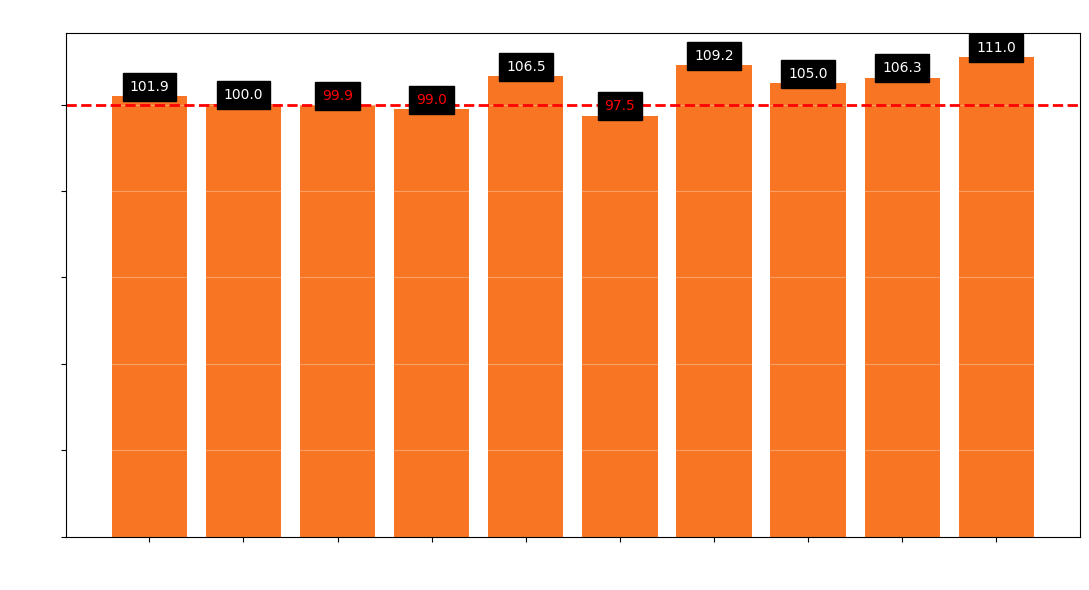

In [76]:
show_result(
    data2025,
    "Mês",
    "Indice",
    "Indice de Venda Real - Material de Construção -  01/2025 à 10/2025",
    "Mês",
    "Indice",
    line_cut=100,
    color="#f87623")

```
print(f"Pré-Pandemia (2003 à 2019): {pre_pandemia['Indice'].mean():.2f}")
print(f"Pandemia (2020 à 2023): {pandemia['Indice'].mean():.2f}")
print(f"Pós-Pandemia (A partir de 2023): {pos_pandemia['Indice'].mean():.2f}")
```
***Pré-Pandemia (2003 à 2019): 78.89
Pandemia (2020 à 2023): 103.17
Pós-Pandemia (A partir de 2023): 103.27***

In [72]:
print(f"Pré-Pandemia (2003 à 2019): {pre_pandemia['Indice'].mean():.2f}")
print(f"Pandemia (2020 à 2023): {pandemia['Indice'].mean():.2f}")
print(f"Pós-Pandemia (A partir de 2023): {pos_pandemia['Indice'].mean():.2f}")


Pré-Pandemia (2003 à 2019): 78.89
Pandemia (2020 à 2023): 103.17
Pós-Pandemia (A partir de 2023): 103.27


In [73]:
pandemia

,Ano,Indice
17,2020,104.955342
18,2021,109.571777
19,2022,100.000000
20,2023,98.163729


In [74]:
pos_pandemia

,Ano,Indice
21,2024,102.916342
22,2025,103.618742
